<h1><center>Régression, Régularisation</center></h1>

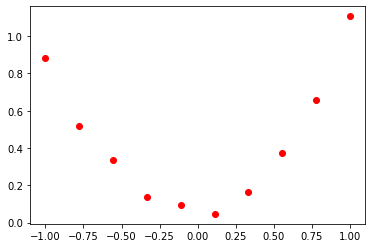

In [4]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-1,1,10)
beta = [.1,.1,1]

t = beta[0] + beta[1]*x + beta[2]*x**2
tnoisy = t+np.random.normal(0,0.1, len(x))

plt.scatter(x, tnoisy, c='r')
plt.show()


On commence par generer des caracteristique polynomiales de facon a augmenter artificiellement la complexite du modele. 

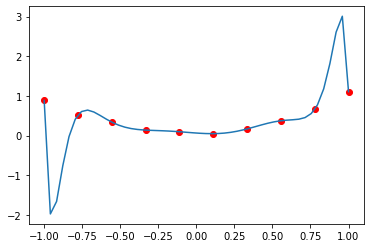

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(30)

xtest = np.linspace(-1,1,50)

Xpoly = poly.fit_transform(x.reshape(-1,1))

model = LinearRegression().fit(Xpoly, tnoisy)

Xpoly_test = poly.fit_transform(xtest.reshape(-1,1))

prediction = model.predict(Xpoly_test)

plt.scatter(x, tnoisy, c='r')
plt.plot(xtest, prediction)
plt.show()


Pour un modele suffisamment complexe, on peut ensuite etudier l'effet des regularisation Ridge et LASSO

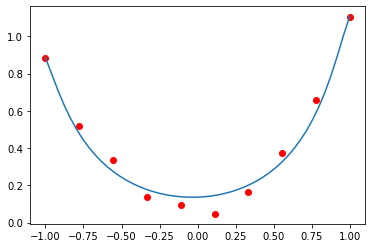

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

poly = PolynomialFeatures(30)

xtest = np.linspace(-1,1,50)

Xpoly = poly.fit_transform(x.reshape(-1,1))

model1 = Ridge(alpha=.2).fit(Xpoly, tnoisy)

Xpoly_test = poly.fit_transform(xtest.reshape(-1,1))

prediction = model1.predict(Xpoly_test)

plt.scatter(x, tnoisy, c='r')
plt.plot(xtest, prediction)
plt.show()


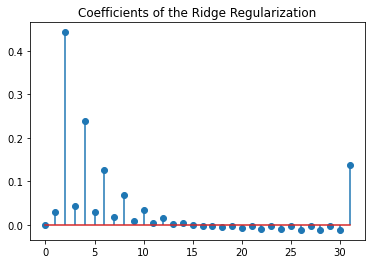

In [20]:
coeff = np.hstack((model1.coef_, model1.intercept_))
plt.stem(coeff)
plt.title('Coefficients of the Ridge Regularization')
plt.show()

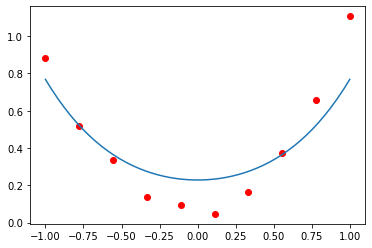

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

poly = PolynomialFeatures(30)

xtest = np.linspace(-1,1,50)

Xpoly = poly.fit_transform(x.reshape(-1,1))

model1 = Lasso(alpha=.05).fit(Xpoly, tnoisy)

Xpoly_test = poly.fit_transform(xtest.reshape(-1,1))

prediction = model1.predict(Xpoly_test)

plt.scatter(x, tnoisy, c='r')
plt.plot(xtest, prediction)
plt.show()


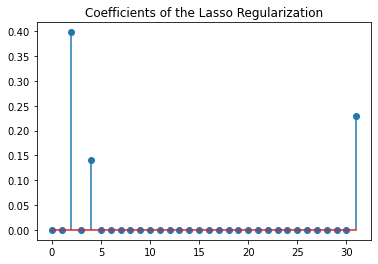

In [24]:
coeff = np.hstack((model1.coef_, model1.intercept_))
plt.stem(coeff)
plt.title('Coefficients of the Lasso Regularization')
plt.show()